In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
import xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmasher as cmr
import matplotlib.colors as colors
import matplotlib.dates as mdates

rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 17
import geopandas as gpd

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
new_cmap = truncate_colormap(cmr.torch_r, .03, 1)

zips = gpd.read_file('../Data/tl_2010_35_zcta510/tl_2010_35_zcta510.shp')


In [3]:
smokepm = xarray.open_dataset('../Data/smoke/KamalZip/BI_Daily_AVG_PM25_TOT_FUSED_bf.nc')
allpm = xarray.open_dataset('../Data/smoke/KamalZip/Daily_ambient_AVG_PM25_TOT_FUSED_bf.nc')

kamal = pd.read_csv('../Data/smoke/KamalZip/bigKamalZip_os.csv')
kamal['Date'] = pd.to_datetime(kamal['Date'])
kamal = kamal.rename(columns = {'Zip':'ZCTA5CE10', 'smokepm25': 'KAMALsmokepm25', 'totalpm25': 'KAMALtotalpm25', 'maxsmokepm25': 'KAMALmaxsmokepm25', 'maxtotalpm25': 'KAMALmaxtotalpm25'})
kamal['ZCTA5CE10'] = kamal['ZCTA5CE10'].astype('int')
warm2 = kamal.groupby('ZCTA5CE10').mean(numeric_only = True).reset_index()
warm2['ZCTA5CE10'] = warm2['ZCTA5CE10'].astype('str')
summer22_2 = zips.merge(warm2, on = 'ZCTA5CE10')

In [4]:
lat = smokepm['latitude']
lon = smokepm['longitude']
sum1smoke =np.mean(smokepm['PM25_TOT_AVG'][:,:,:], axis = 0)
sum2smoke = np.mean(sum1smoke[:,:], axis = 0)

sum1total =np.mean(allpm['PM25_TOT_AVG'][:,:,:], axis = 0)
sum2total= np.mean(sum1total[:,:], axis = 0)

In [5]:
summer22_2['KAMALsmokepm25'].max()

2.581868719903302

In [6]:
subbed = summer22_2[summer22_2['ZCTA5CE10'] == '88267']

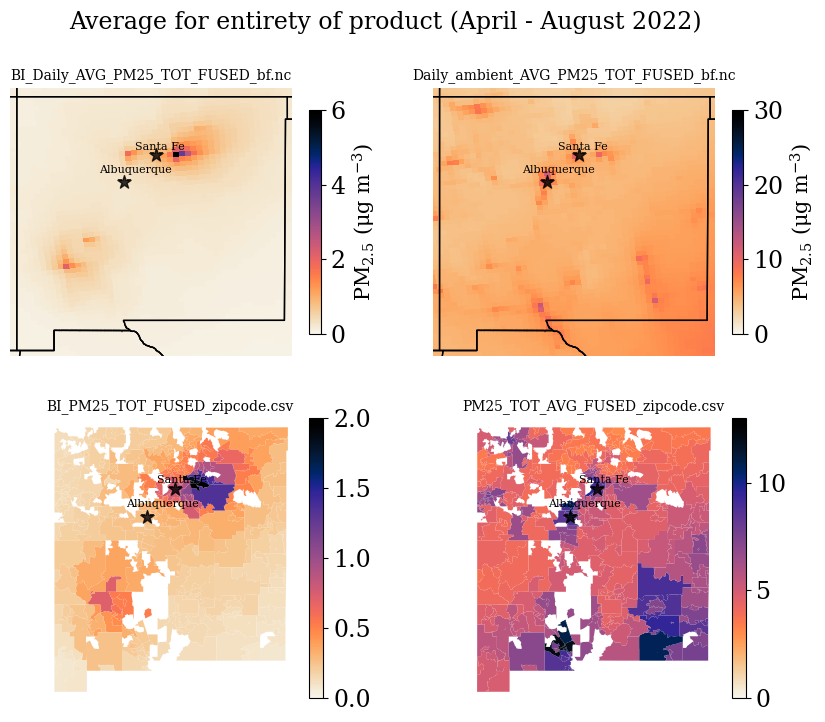

In [7]:
norm = colors.Normalize(vmin = 0, vmax= 13)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=new_cmap)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
plt.suptitle('Average for entirety of product (April - August 2022)', fontsize = 17, y = .97)
ax.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs = ax.pcolormesh(lon, lat, sum2smoke, cmap = new_cmap, vmin = 0, vmax = 6)
cax, kw = mplt.colorbar.make_axes(ax, location = 'right', pad = 0.05, shrink = .8)
cbar = fig.colorbar(cs, cax=cax, **kw)
cbar.set_label('PM$_{2.5}$ ($\mu$g m$^{-3}$)', fontsize = 15)
ax.axis('off')
ax.set_title('BI_Daily_AVG_PM25_TOT_FUSED_bf.nc', fontsize = 10)

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax2.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs2 = ax2.pcolormesh(lon, lat, sum2total, cmap = new_cmap, vmin = 0, vmax = 30)
cax, kw = mplt.colorbar.make_axes(ax2, location = 'right', pad = 0.05, shrink = .8)
cbar = fig.colorbar(cs2, cax=cax, **kw)
cbar.set_label('PM$_{2.5}$ ($\mu$g m$^{-3}$)', fontsize = 15)
ax2.axis('off')
ax2.set_title('Daily_ambient_AVG_PM25_TOT_FUSED_bf.nc', fontsize = 10)

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax3.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax3.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
summer22_2.plot(column = 'KAMALsmokepm25', ax = ax3, cmap = new_cmap, legend = True, vmin = 0, vmax = 2)
ax3.axis('off')
ax3.set_title('BI_PM25_TOT_FUSED_zipcode.csv', fontsize = 10)

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax4.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax4.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax4.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax4.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs4 =summer22_2.plot(column = 'KAMALtotalpm25', ax = ax4, cmap = new_cmap, legend = True, vmin = 0, vmax = 13)
ax4.axis('off')
ax4.set_title('PM25_TOT_AVG_FUSED_zipcode.csv', fontsize = 10)

fig.savefig('../Figures/KamalGrid.png', dpi = 300, bbox_inches = 'tight')

In [8]:
pop = xarray.open_dataset('../Data/smoke/KamalZip/regridded_pop_density.nc')
kamalpop = xarray.open_dataset('../Data/smoke/KamalZip/regridded_pop_count_kamal.nc')
cmap2 = truncate_colormap(cmr.ocean_r, .05, 1)

Text(0.5, 1.0, 'Pop COUNT regridded from GPW4 \nto same grid as Kamal data')

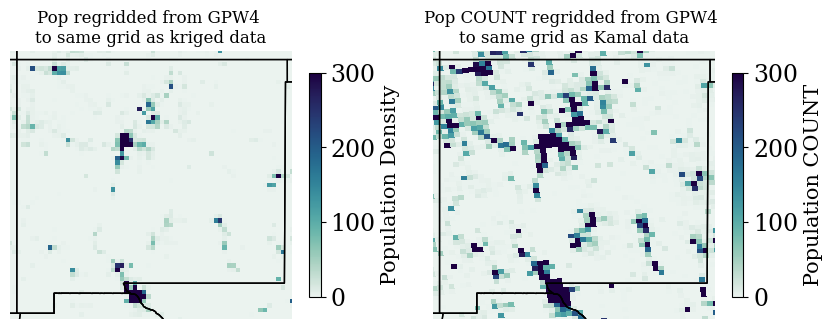

In [9]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
#ax.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
#ax.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
#ax.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
#ax.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs = ax.pcolormesh(pop['lon'], pop['lat'], pop['population'], cmap = cmap2, vmin = 0, vmax = 300)
cax, kw = mplt.colorbar.make_axes(ax, location = 'right', pad = 0.05, shrink = .8)
cbar = fig.colorbar(cs, cax=cax, **kw)
cbar.set_label('Population Density', fontsize = 15)
ax.axis('off')
ax.set_title('Pop regridded from GPW4 \nto same grid as kriged data', fontsize = 12)

ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
#ax.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
#ax.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
#ax.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
#ax.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
cs = ax.pcolormesh(kamalpop['lon'], kamalpop['lat'], kamalpop['population'], cmap = cmap2, vmin = 0, vmax = 300)
cax, kw = mplt.colorbar.make_axes(ax, location = 'right', pad = 0.05, shrink = .8)
cbar = fig.colorbar(cs, cax=cax, **kw)
cbar.set_label('Population COUNT', fontsize = 15)
ax.axis('off')
ax.set_title('Pop COUNT regridded from GPW4 \nto same grid as Kamal data', fontsize = 12)


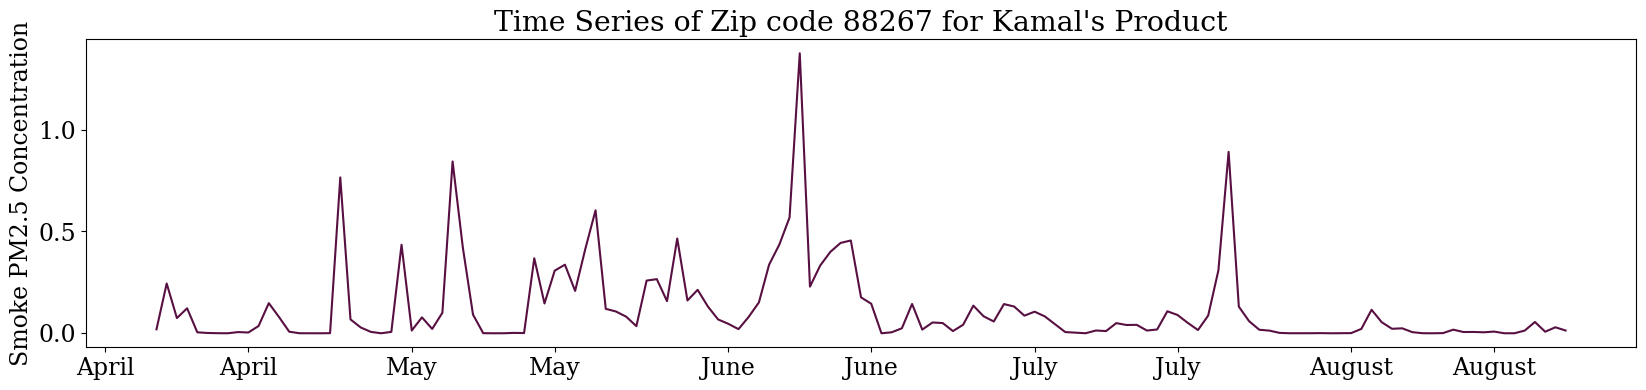

In [10]:
onezip = kamal[kamal['ZCTA5CE10'] == 88267]
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(onezip['Date'], onezip['KAMALsmokepm25'], color = 'xkcd:plum')
ax.set_ylabel('Smoke PM2.5 Concentration')
ax.set_title('Time Series of Zip code 88267 for Kamal\'s Product')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B"))

In [11]:
pop = pd.read_csv('../Data/smoke/KamalZip/BI_PM25_TOT_AVG_FUSED_zipcode_popcount.csv')
nopop = pd.read_csv('../Data/smoke/KamalZip/BI_PM25_TOT_AVG_FUSED_zipcode_nopop.csv')

In [12]:
popmelt = pop.melt(id_vars = ['Date'], var_name = 'Zip', value_name= 'popsmokepm25')
nonpopmelt= nopop.melt(id_vars = ['Date'], var_name = 'Zip', value_name= 'nopopsmokepm25')
alltogether = pd.merge(popmelt, nonpopmelt, on = ['Date', 'Zip'])
meanZip = alltogether.groupby('Zip').mean(numeric_only = True).reset_index()
meanZip = meanZip.rename(columns = {'Zip':'ZCTA5CE10'})
meanZip['ZCTA5CE10'] = meanZip['ZCTA5CE10'].astype('str')
plottingcheck = zips.merge(meanZip, on = 'ZCTA5CE10')

In [13]:
np.max(plottingcheck['nopopsmokepm25'])

0.9391387187641046

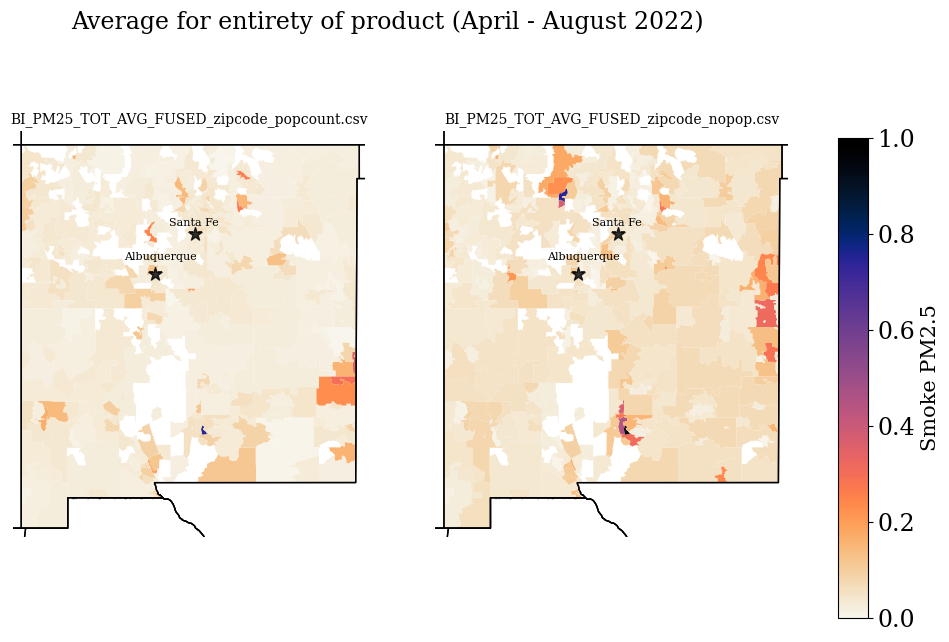

In [14]:
norm = colors.Normalize(vmin = 0, vmax= 1)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=new_cmap)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
plt.suptitle('Average for entirety of product (April - August 2022)', fontsize = 17, y = .9)
ax.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
plottingcheck.plot(column = 'popsmokepm25', ax = ax, cmap = new_cmap, legend = False, vmin = 0, vmax = 1)
ax.axis('off')
ax.set_title('BI_PM25_TOT_AVG_FUSED_zipcode_popcount.csv', fontsize = 10)

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.BORDERS)
ax2.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax2.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
plottingcheck.plot(column = 'nopopsmokepm25', ax = ax2, cmap = new_cmap, legend = False, vmin = 0, vmax = 1)
ax2.axis('off')
ax2.set_title('BI_PM25_TOT_AVG_FUSED_zipcode_nopop.csv', fontsize = 10)
cb_ax = fig.add_axes([.95,.14,.03,.6])
ax_cbar = fig.colorbar(cbar, ax=ax2,  cax = cb_ax, orientation = 'vertical')
ax_cbar.set_label('Smoke PM2.5', fontsize = 15)

In [15]:
big = pd.read_csv('../Data/smoke/KamalZip/bigKamalZip_os.csv')
meanZip = big.groupby('Zip').mean(numeric_only = True).reset_index()
meanZip = meanZip.rename(columns = {'Zip':'ZCTA5CE10'})
meanZip['ZCTA5CE10'] = meanZip['ZCTA5CE10'].astype('str')
new = zips.merge(meanZip, on = 'ZCTA5CE10')

In [18]:
new['maxsmokepm25'].max()

9.2305405360018

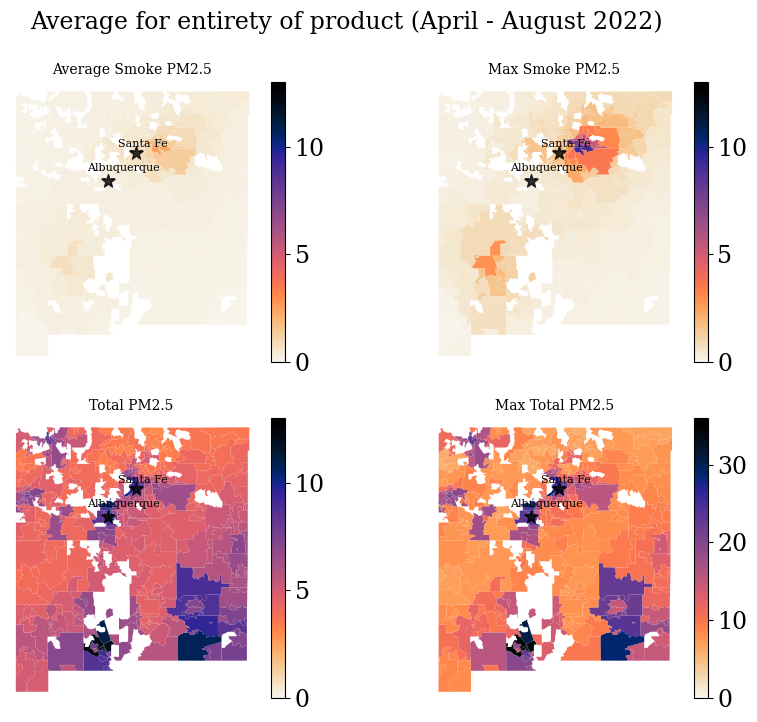

In [17]:
norm = colors.Normalize(vmin = 0, vmax= 13)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=new_cmap)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
plt.suptitle('Average for entirety of product (April - August 2022)', fontsize = 17, y = .97)
ax.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
new.plot(column = 'smokepm25', ax = ax, cmap = new_cmap, legend = True, vmin = 0, vmax = 13)
ax.axis('off')
ax.set_title('Average Smoke PM2.5', fontsize = 10)

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax2.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax2.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax2.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
new.plot(column = 'maxsmokepm25', ax = ax2, cmap = new_cmap, legend = True, vmin = 0, vmax = 13)
ax2.axis('off')
ax2.set_title('Max Smoke PM2.5', fontsize = 10)

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax3.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax3.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax3.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
new.plot(column = 'totalpm25', ax = ax3, cmap = new_cmap, legend = True, vmin = 0, vmax = 13)
ax3.axis('off')
ax3.set_title('Total PM2.5', fontsize = 10)

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
ax4.scatter(-106.6504, 35.0844, color = 'k', s= 100, marker ="*", zorder = 15, alpha = 0.8)
ax4.annotate("Albuquerque", (-107.2, 35.3), fontsize = 8, zorder = 20);
ax4.scatter(-105.9378, 35.6870, color = 'k', s = 100, marker ="*", zorder = 15, alpha = 0.8)
ax4.annotate("Santa Fe", (-106.4, 35.8), fontsize = 8, zorder = 20);
new.plot(column = 'maxtotalpm25', ax = ax4, cmap = new_cmap, legend = True, vmin = 0, vmax = 36)
ax4.axis('off')
ax4.set_title('Max Total PM2.5', fontsize = 10)

fig.savefig('../Figures/KamalGrid.png', dpi = 300, bbox_inches = 'tight')